# step1: Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# step2:Importing the dataset

In [2]:
df=pd.read_csv(r"E:\my courses\courses\mine\ai\Machine Learning\machine learning\datasets\logistic regression\hearing_test.csv")

# step3: data overview

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df.shape

(5000, 3)

In [7]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


# step4:Exploratory data analysis

In [8]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

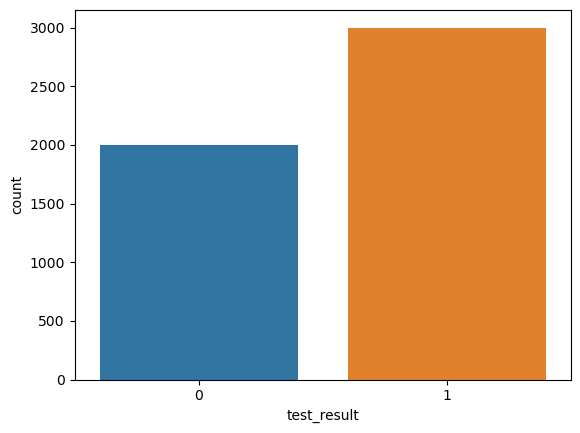

In [9]:
sns.countplot(data=df,x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

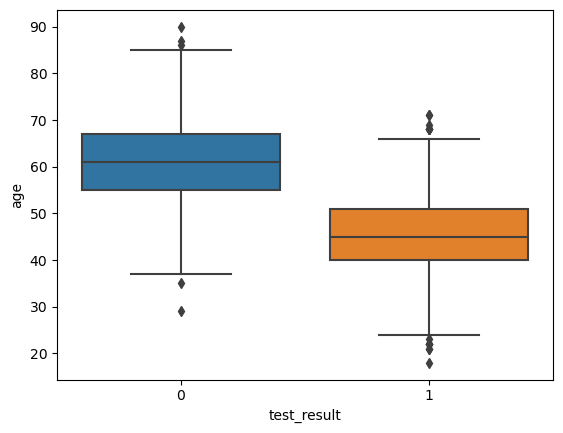

In [10]:
sns.boxplot(data=df,x='test_result',y="age")

<Axes: xlabel='test_result', ylabel='physical_score'>

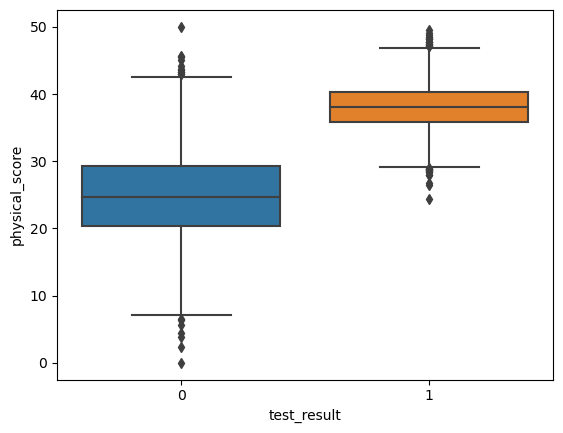

In [11]:
sns.boxplot(data=df,x='test_result',y="physical_score")

<Axes: xlabel='age', ylabel='physical_score'>

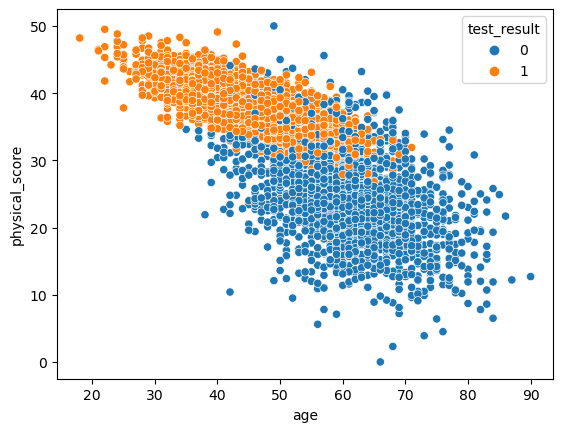

In [12]:
sns.scatterplot(data=df,x="age",y="physical_score",hue="test_result")

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


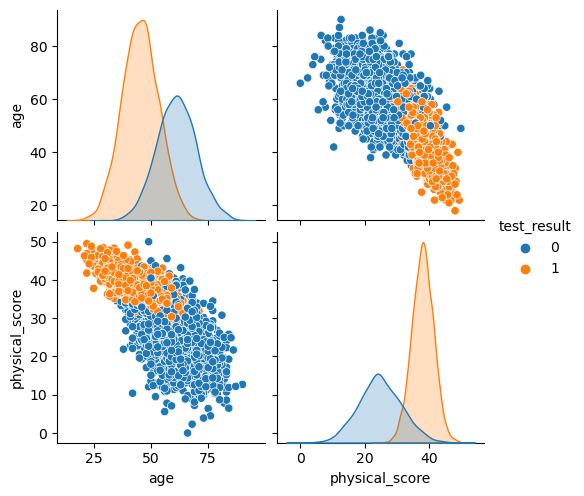

In [13]:
sns.pairplot(df,hue="test_result")

# step5: determine the features and target variable

In [14]:
X=df.drop("test_result",axis=1)
y=df["test_result"]

In [15]:
X

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9
...,...,...
4995,73.0,3.9
4996,57.0,33.9
4997,49.0,34.5
4998,38.0,46.4


In [16]:
y

0       1
1       1
2       0
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: test_result, Length: 5000, dtype: int64

# Step6: splite the dataset to train and test

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

# Step7: scalling the features

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
scaler.fit(X_train)

StandardScaler()

In [22]:
scaled_X_train=scaler.transform(X_train)
scaled_X_test=scaler.transform(X_test)

# step8: train the model

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
log_model=LogisticRegression()

In [25]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

# step9: predicting test data

In [26]:
y_pred=log_model.predict(scaled_X_test)

# step10: evaluating the model

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [28]:
accuracy_score(y_test,y_pred)

0.93

In [29]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

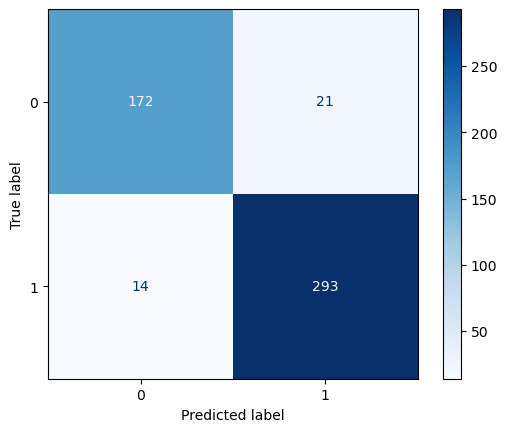

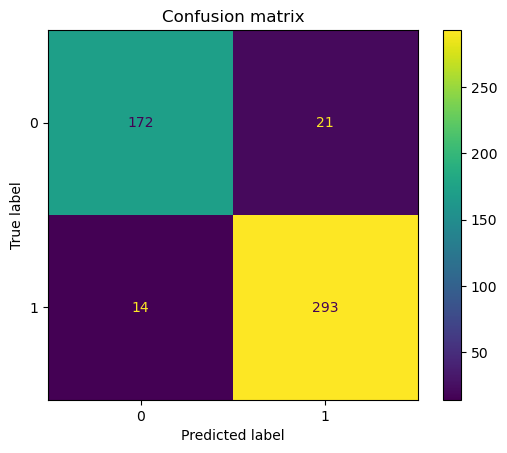

In [34]:
disp=ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test,display_labels=log_model.classes_,cmap="Blues")
disp.plot()
plt.title("Confusion matrix")
plt.show()

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



# step11: evaluating curves and AUC

In [37]:
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay,average_precision_score

In [38]:
# mohasebeye maghadire precision-recall
precision,recall,_=precision_recall_curve(y_test,log_model.decision_function(scaled_X_test))
# mohasebeye auc
auc_pr=average_precision_score(y_test,log_model.decision_function(scaled_X_test))
print(f" precision-recall auc:{auc_pr:.2f}")


 precision-recall auc:0.96


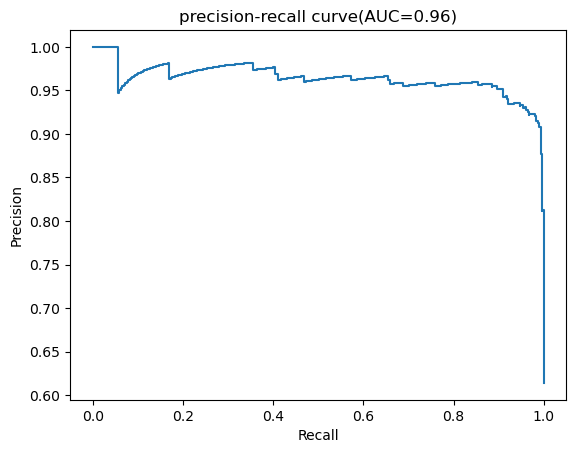

In [40]:
#namayeshe precision-recall curve

disp2=PrecisionRecallDisplay(precision=precision,recall=recall)
disp2.plot()
plt.title(f"precision-recall curve(AUC={auc_pr:.2f})")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


 ROC AUC: 0.96


Text(0.5, 1.0, 'ROC Curve(AUC=0.96)')

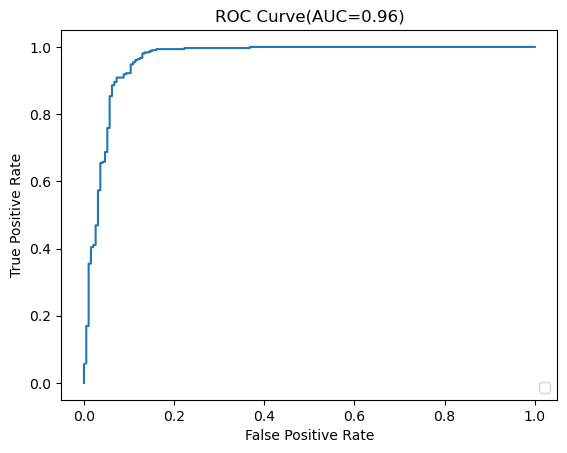

In [42]:
from sklearn.metrics import roc_curve,RocCurveDisplay,auc

fpr,tpr,_=roc_curve(y_test,log_model.decision_function(scaled_X_test))
auc_roc=auc(fpr,tpr)
print(f" ROC AUC: {auc_roc:.2f}")

disp=RocCurveDisplay(fpr=fpr,tpr=tpr)
disp.plot()
plt.title(f"ROC Curve(AUC={auc_roc:.2f})")

# save

In [43]:
from joblib import dump, load

# Save the model and the polynomial converter
dump(log_model, r"E:\my courses\courses\mine\ai\Machine Learning\machine learning\s5-Logistic regression\p\hearing.joblib")
dump(scaler, r"E:\my courses\courses\mine\ai\Machine Learning\machine learning\s5-Logistic regression\p\scaler.joblib")

['E:\\my courses\\courses\\mine\\ai\\Machine Learning\\machine learning\\s5-Logistic regression\\p\\scaler.joblib']

# load

In [44]:
# Load the saved model, polynomial converter, and scaler
load_log = load(r"E:\my courses\courses\mine\ai\Machine Learning\machine learning\s5-Logistic regression\p\hearing.joblib")
load_scaler = load(r"E:\my courses\courses\mine\ai\Machine Learning\machine learning\s5-Logistic regression\p\scaler.joblib")

# Predict for new data

In [47]:
# Prepare new data for prediction
hearing = [[80,25]]


# Scale the polynomial features
hearing_scale= load_scaler.transform(hearing)

# Make a prediction
prediction = load_log.predict(hearing_scale)
print(prediction)

[0]


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
